In [1]:
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
# importing the dataset
df=pd.read_csv('disaster_event.csv')

In [4]:
df.head()

,Entity,Year,Disasters
0,All disasters,1900,6
1,All disasters excluding earthquakes,1900,5
2,All disasters excluding extreme temperature,1900,6
3,Drought,1900,2
4,Earthquake,1900,1


In [6]:
df.columns

Index(['Entity', 'Year', 'Disasters'], dtype='object')

In [ ]:
#  disaster= dependent
## others are independent

In [8]:
df.shape

(1144, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     1144 non-null   object
 1   Year       1144 non-null   int64 
 2   Disasters  1144 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.9+ KB


In [12]:
df1=df.copy()

In [13]:
# are there any null values 
df1.isnull().sum()

Entity       0
Year         0
Disasters    0
dtype: int64

<Axes: ylabel='Disasters'>

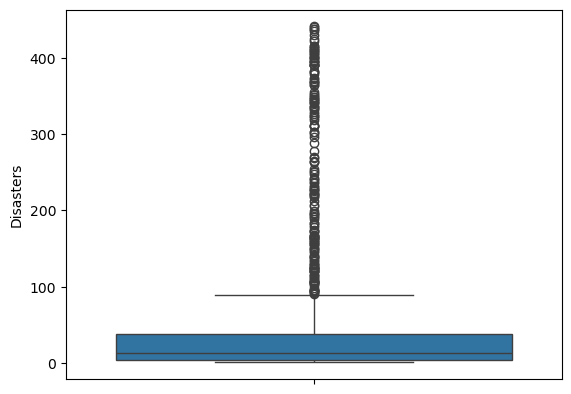

In [15]:
sns.boxplot(df1['Disasters'])

<Axes: ylabel='Year'>

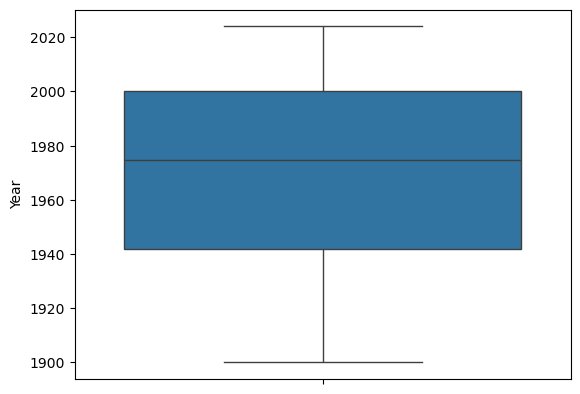

In [16]:
sns.boxplot(df1['Year'])

In [ ]:
#EDA

<Axes: xlabel='count', ylabel='Entity'>

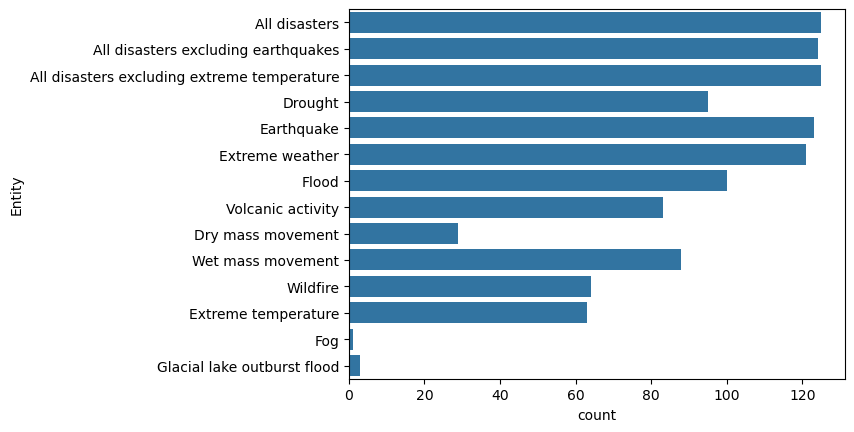

In [20]:
sns.countplot(df1['Entity'])

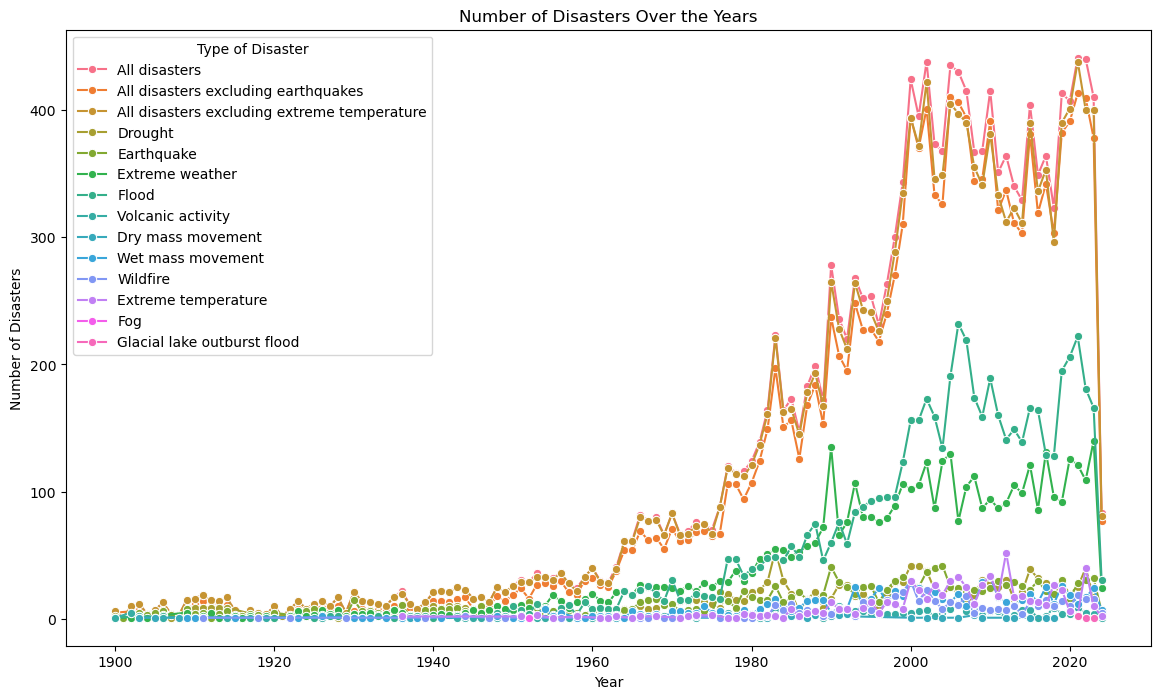

In [22]:
#line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='Year', y='Disasters', hue='Entity', marker='o')
plt.title('Number of Disasters Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Type of Disaster')
plt.show()

In [ ]:
#heat map
# Pivot the data for the heatmap
heatmap_data = df1.pivot("")

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Number of Disasters by Year and Type')
plt.xlabel('Type of Disaster')
plt.ylabel('Year')
plt.show()


In [30]:
df1.describe(include='all')

,Entity,Year,Disasters
count,1144,1144.000000,1144.000000
unique,14,NaN,NaN
top,All disasters,NaN,NaN
freq,125,NaN,NaN
mean,NaN,1969.972028,54.489510
std,NaN,34.977347,99.235229
min,NaN,1900.000000,1.000000
25%,NaN,1942.000000,4.000000
50%,NaN,1974.500000,13.000000
75%,NaN,2000.000000,38.250000


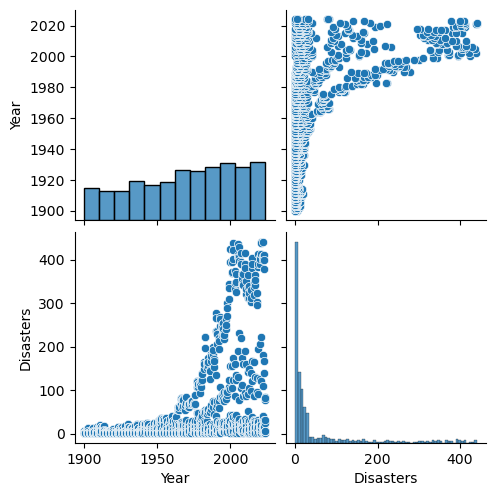

In [31]:
sns.pairplot(df1)
plt.show()

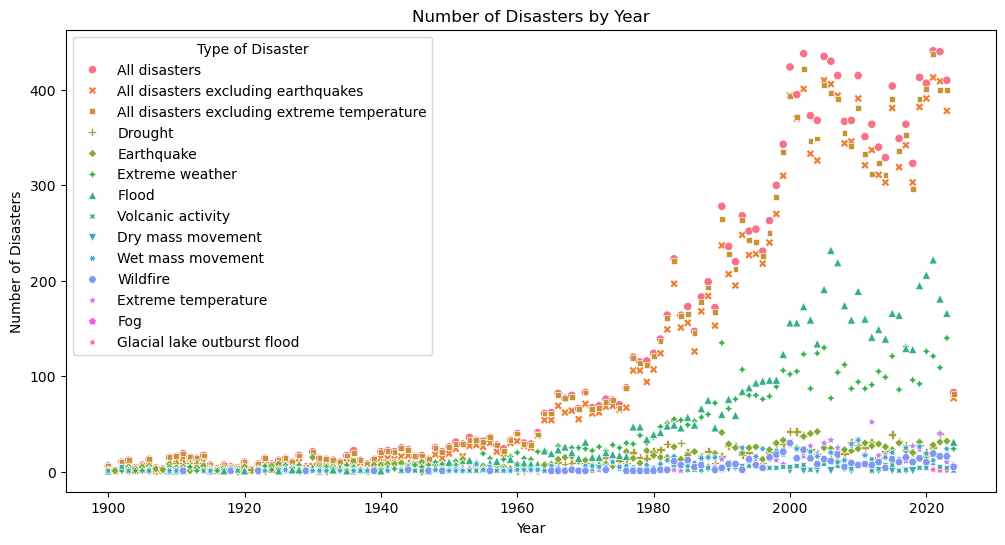

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='Year', y='Disasters', hue='Entity', style='Entity')
plt.title('Number of Disasters by Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Type of Disaster')
plt.show()

In [34]:
# dividing the data into dep and independent variables
X=df1.drop('Disasters',axis=1)  # independent variable
y=df1['Disasters']  # dep var

In [36]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)  # sequence will be  same train and test

In [37]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(915, 2) (229, 2) (915,) (229,)


In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)  #training on x_train , y_train

ValueError: could not convert string to float: 'All disasters'